In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx

C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_origin = pd.read_feather('data/od_origin.feather')
df_des = pd.read_feather('data/od_des.feather')
oa_london = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp")
oa_london = oa_london.to_crs(epsg=27700)

ward_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Ward.shp")
ward_shp = ward_shp.to_crs(epsg=27700)

borough_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
borough_shp = borough_shp.to_crs(epsg=27700)

msoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
msoa_shp = msoa_shp.to_crs(epsg=27700)

1. origin

In [3]:
MSOA_Ori_Order_Count = df_origin['MSOA11CD_origin'].value_counts()
# only filter all the origin oaid that has more than 1200 numbers
MSOA_Ori_Order_Count

MSOA11CD_origin
E02000977    35157
E02000001    33019
E02000972    27511
E02000524    14638
E02000970    13316
             ...  
E02000869      788
E02000380      766
E02000414      742
E02000432      591
E02000347      583
Name: count, Length: 983, dtype: int64

In [4]:
# save the Ori_Order_Count to a list
MSOA_Ori_Order_Count_list = MSOA_Ori_Order_Count.index.tolist()
# create a new dataframe, with 80 rows and 2000 columns, fill with 0
MSOA_origin_PDFs = pd.DataFrame(np.zeros((len(MSOA_Ori_Order_Count_list), 2880)), columns=range(2880))
# add each name in the Ori_Order_Count_list to the df as the index column
MSOA_origin_PDFs.index = MSOA_Ori_Order_Count_list
MSOA_origin_PDFs

0     1     2     3     4     5     6     7     8     9     ...  \
E02000977   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000001   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000972   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000524   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000970   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
E02000869   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000380   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000414   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000432   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
E02000347   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

           2870  2871  2872  2873  2874  2875  2876  2877  2878  2879  
E02000977   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000001   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000972   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000524   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000970   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
E02000869   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000380   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000414   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000432   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
E02000347   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[983 rows x 2880 columns]

In [ ]:
# iterate throught eh ori_order_count_list, and get the corresponding rows in the df_origin
for MSOAcode in MSOA_Ori_Order_Count_list:
    data_test = df_origin[df_origin['MSOA11CD_origin'] == MSOAcode]
    # 计算'start_time'和'end_time'这两列的中间时刻，即平均时间
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    # 新建一列'hour_time',存储'mid_time'代表的分钟数，即从0点0分开始后的第几分钟，类型为数值
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    # 使用高斯核密度估计（KDE），权重为 duration
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    # 生成 x 轴范围为 0-1440 的值, 2880 为点的个数
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    # 将结果转换为 numpy 数组
    density_array = np.array(density)
    # 将密度估计结果填入索引内容为 OAcode 的那一行
    MSOA_origin_PDFs.loc[MSOAcode] = density_array

    

C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
MSOA_origin_PDFs

0         1         2         3         4         5     \
E02000977  0.000194  0.000195  0.000196  0.000197  0.000198  0.000199   
E02000972  0.000164  0.000165  0.000166  0.000167  0.000168  0.000169   
E02000001  0.000154  0.000154  0.000155  0.000155  0.000156  0.000157   
E02000524  0.000050  0.000050  0.000050  0.000050  0.000051  0.000051   
E02000476  0.000083  0.000084  0.000084  0.000084  0.000085  0.000085   
...             ...       ...       ...       ...       ...       ...   
E02000734  0.000023  0.000023  0.000023  0.000023  0.000024  0.000024   
E02000414  0.000178  0.000178  0.000179  0.000179  0.000179  0.000180   
E02000432  0.000129  0.000129  0.000130  0.000130  0.000130  0.000130   
E02000380  0.000208  0.000208  0.000208  0.000208  0.000208  0.000208   
E02000347  0.000044  0.000044  0.000044  0.000044  0.000044  0.000044   

               6         7         8         9     ...      2870      2871  \
E02000977  0.000200  0.000201  0.000202  0.000203  ...  0.000283  0.000281   
E02000972  0.000170  0.000171  0.000172  0.000173  ...  0.000258  0.000257   
E02000001  0.000157  0.000158  0.000159  0.000159  ...  0.000316  0.000315   
E02000524  0.000051  0.000051  0.000051  0.000052  ...  0.000108  0.000108   
E02000476  0.000086  0.000086  0.000087  0.000087  ...  0.000111  0.000110   
...             ...       ...       ...       ...  ...       ...       ...   
E02000734  0.000024  0.000024  0.000024  0.000025  ...  0.000228  0.000227   
E02000414  0.000180  0.000180  0.000181  0.000181  ...  0.000336  0.000335   
E02000432  0.000130  0.000131  0.000131  0.000131  ...  0.000390  0.000389   
E02000380  0.000209  0.000209  0.000209  0.000209  ...  0.000096  0.000096   
E02000347  0.000044  0.000044  0.000044  0.000044  ...  0.000240  0.000239   

               2872      2873      2874      2875      2876      2877  \
E02000977  0.000279  0.000277  0.000275  0.000273  0.000271  0.000269   
E02000972  0.000255  0.000253  0.000252  0.000250  0.000248  0.000246   
E02000001  0.000313  0.000312  0.000310  0.000309  0.000308  0.000306   
E02000524  0.000107  0.000106  0.000105  0.000105  0.000104  0.000103   
E02000476  0.000109  0.000108  0.000107  0.000106  0.000105  0.000104   
...             ...       ...       ...       ...       ...       ...   
E02000734  0.000227  0.000226  0.000225  0.000224  0.000223  0.000223   
E02000414  0.000334  0.000333  0.000332  0.000331  0.000330  0.000329   
E02000432  0.000388  0.000387  0.000386  0.000385  0.000384  0.000383   
E02000380  0.000095  0.000095  0.000095  0.000094  0.000094  0.000094   
E02000347  0.000238  0.000237  0.000237  0.000236  0.000235  0.000234   

               2878      2879  
E02000977  0.000268  0.000266  
E02000972  0.000245  0.000243  
E02000001  0.000305  0.000303  
E02000524  0.000102  0.000102  
E02000476  0.000103  0.000102  
...             ...       ...  
E02000734  0.000222  0.000221  
E02000414  0.000328  0.000327  
E02000432  0.000382  0.000381  
E02000380  0.000093  0.000093  
E02000347  0.000233  0.000232  

[983 rows x 2880 columns]

In [ ]:
MSOA_origin_PDFs.to_csv('output/MSOA_origin_PDFs_inverse.csv')

In [ ]:
#read the MSOA_origin_PDFs.csv from file
MSOA_origin_PDFs_inverse_raw = pd.read_csv('output/MSOA_origin_PDFs_inverse.csv', index_col=0)

In [ ]:
# normalize each row in the MSOA_origin_PDFs
MSOA_origin_PDFs_inverse = MSOA_origin_PDFs_inverse_raw.div(MSOA_origin_PDFs_inverse_raw.sum(axis=1), axis=0)

In [ ]:
# calculate the sum of first row in the MSOA_origin_PDFs
print(MSOA_origin_PDFs_inverse.iloc[0].sum())
print(MSOA_origin_PDFs_inverse.iloc[1].sum())

0.999999999999998
1.0000000000000013


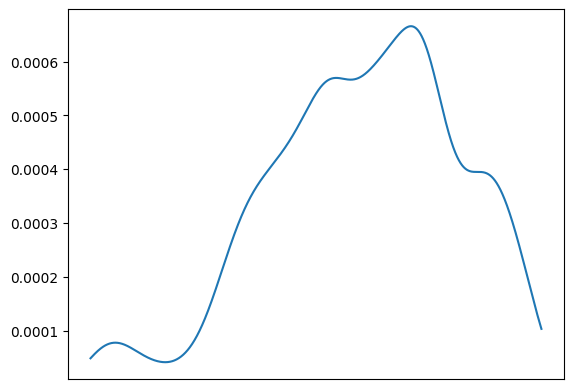

In [ ]:
# plot E02000977 in MSOA_origin_PDFs_inverse
plt.plot(MSOA_origin_PDFs_inverse.loc['E02000977'])
# hide the x-axis and its label
plt.xticks([])
plt.show()

In [ ]:
# save all unique values of MSOA_origin_PDFs to a list
MSOA_origin_PDFs_inverse_list = MSOA_origin_PDFs_inverse.index.tolist()
# create a data matrix with 983 rows and 983 columns, filled with 0.00, and the columns and rows are the MSOA_origin_PDFs_list
MSOA_origin_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_origin_PDFs_inverse_list), len(MSOA_origin_PDFs_inverse_list))), columns=MSOA_origin_PDFs_inverse_list, index=MSOA_origin_PDFs_inverse_list)
MSOA_origin_PDFs_inverse_matrix

E02000977  E02000972  E02000001  E02000524  E02000476  E02000726  \
E02000977        0.0        0.0        0.0        0.0        0.0        0.0   
E02000972        0.0        0.0        0.0        0.0        0.0        0.0   
E02000001        0.0        0.0        0.0        0.0        0.0        0.0   
E02000524        0.0        0.0        0.0        0.0        0.0        0.0   
E02000476        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
E02000734        0.0        0.0        0.0        0.0        0.0        0.0   
E02000414        0.0        0.0        0.0        0.0        0.0        0.0   
E02000432        0.0        0.0        0.0        0.0        0.0        0.0   
E02000380        0.0        0.0        0.0        0.0        0.0        0.0   
E02000347        0.0        0.0        0.0        0.0        0.0        0.0   

           E02006801  E02006929  E02000193  E02000606  ...  E02000373  \
E02000977        0.0        0.0        0.0        0.0  ...        0.0   
E02000972        0.0        0.0        0.0        0.0  ...        0.0   
E02000001        0.0        0.0        0.0        0.0  ...        0.0   
E02000524        0.0        0.0        0.0        0.0  ...        0.0   
E02000476        0.0        0.0        0.0        0.0  ...        0.0   
...              ...        ...        ...        ...  ...        ...   
E02000734        0.0        0.0        0.0        0.0  ...        0.0   
E02000414        0.0        0.0        0.0        0.0  ...        0.0   
E02000432        0.0        0.0        0.0        0.0  ...        0.0   
E02000380        0.0        0.0        0.0        0.0  ...        0.0   
E02000347        0.0        0.0        0.0        0.0  ...        0.0   

           E02000171  E02000352  E02000345  E02006918  E02000734  E02000414  \
E02000977        0.0        0.0        0.0        0.0        0.0        0.0   
E02000972        0.0        0.0        0.0        0.0        0.0        0.0   
E02000001        0.0        0.0        0.0        0.0        0.0        0.0   
E02000524        0.0        0.0        0.0        0.0        0.0        0.0   
E02000476        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
E02000734        0.0        0.0        0.0        0.0        0.0        0.0   
E02000414        0.0        0.0        0.0        0.0        0.0        0.0   
E02000432        0.0        0.0        0.0        0.0        0.0        0.0   
E02000380        0.0        0.0        0.0        0.0        0.0        0.0   
E02000347        0.0        0.0        0.0        0.0        0.0        0.0   

           E02000432  E02000380  E02000347  
E02000977        0.0        0.0        0.0  
E02000972        0.0        0.0        0.0  
E02000001        0.0        0.0        0.0  
E02000524        0.0        0.0        0.0  
E02000476        0.0        0.0        0.0  
...              ...        ...        ...  
E02000734        0.0        0.0        0.0  
E02000414        0.0        0.0        0.0  
E02000432        0.0        0.0        0.0  
E02000380        0.0        0.0        0.0  
E02000347        0.0        0.0        0.0  

[983 rows x 983 columns]

In [ ]:
# test the hellinger distance between E02000977 and E02000001
a=MSOA_origin_PDFs_inverse.loc['E02000977']
b=MSOA_origin_PDFs_inverse.loc['E02000001']
hellinger_distance = np.sqrt(np.sum((np.sqrt(a) - np.sqrt(b)) ** 2)) / np.sqrt(2)
hellinger_distance

0.10358864221226494

In [ ]:
# for each value in the matrix, calculate the hellinger distance between the two PDF lists of these two MSOAs values
for i in MSOA_origin_PDFs_inverse_list:
    for j in MSOA_origin_PDFs_inverse_list:
        # calculate the hellinger distance between two PDF lists
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_origin_PDFs_inverse.loc[i]) - np.sqrt(MSOA_origin_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        # fill the hellinger distance into the matrix
        MSOA_origin_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_origin_PDFs_inverse_matrix

E02000977  E02000972  E02000001  E02000524  E02000476  E02000726  \
E02000977   0.000000   0.045157   0.089504   0.304849   0.171846   0.161169   
E02000972   0.045157   0.000000   0.116059   0.316907   0.162015   0.148997   
E02000001   0.089504   0.116059   0.000000   0.227373   0.137652   0.131611   
E02000524   0.304849   0.316907   0.227373   0.000000   0.233320   0.216371   
E02000476   0.171846   0.162015   0.137652   0.233320   0.000000   0.083598   
...              ...        ...        ...        ...        ...        ...   
E02000734   0.239157   0.236911   0.179011   0.154747   0.117045   0.117845   
E02000414   0.119993   0.146182   0.055239   0.201244   0.170127   0.151096   
E02000432   0.064680   0.078371   0.063744   0.269809   0.133249   0.125322   
E02000380   0.208576   0.186032   0.195905   0.268984   0.104112   0.109160   
E02000347   0.218317   0.230229   0.140315   0.142991   0.129170   0.143004   

           E02006801  E02006929  E02000193  E02000606  ...  E02000373  \
E02000977   0.109194   0.189099   0.069262   0.167993  ...   0.257686   
E02000972   0.118062   0.185798   0.081720   0.159107  ...   0.266896   
E02000001   0.084162   0.149242   0.078850   0.138728  ...   0.181345   
E02000524   0.254567   0.236079   0.282045   0.248190  ...   0.089968   
E02000476   0.105539   0.064649   0.125998   0.034768  ...   0.160038   
...              ...        ...        ...        ...  ...        ...   
E02000734   0.172892   0.119219   0.201752   0.131072  ...   0.094019   
E02000414   0.121528   0.179563   0.124509   0.177237  ...   0.173788   
E02000432   0.060661   0.138372   0.040299   0.129706  ...   0.218329   
E02000380   0.185107   0.158156   0.185576   0.107715  ...   0.207439   
E02000347   0.135496   0.109804   0.173409   0.140577  ...   0.083977   

           E02000171  E02000352  E02000345  E02006918  E02000734  E02000414  \
E02000977   0.163197   0.218175   0.171428   0.178893   0.239157   0.119993   
E02000972   0.168437   0.223313   0.189440   0.178863   0.236911   0.146182   
E02000001   0.108546   0.162389   0.101336   0.127319   0.179011   0.055239   
E02000524   0.170845   0.209785   0.186885   0.211555   0.154747   0.201244   
E02000476   0.122955   0.117937   0.147893   0.070799   0.117045   0.170127   
...              ...        ...        ...        ...        ...        ...   
E02000734   0.125436   0.155461   0.153513   0.117892   0.000000   0.185800   
E02000414   0.107462   0.185365   0.104998   0.155059   0.185800   0.000000   
E02000432   0.145915   0.172342   0.118543   0.125429   0.195594   0.101720   
E02000380   0.143852   0.187289   0.228465   0.156919   0.153507   0.223004   
E02000347   0.135432   0.109556   0.080977   0.092311   0.102468   0.143675   

           E02000432  E02000380  E02000347  
E02000977   0.064680   0.208576   0.218317  
E02000972   0.078371   0.186032   0.230229  
E02000001   0.063744   0.195905   0.140315  
E02000524   0.269809   0.268984   0.142991  
E02000476   0.133249   0.104112   0.129170  
...              ...        ...        ...  
E02000734   0.195594   0.153507   0.102468  
E02000414   0.101720   0.223004   0.143675  
E02000432   0.000000   0.190696   0.166985  
E02000380   0.190696   0.000000   0.208464  
E02000347   0.166985   0.208464   0.000000  

[983 rows x 983 columns]

In [ ]:
MSOA_origin_PDFs_inverse_matrix.to_csv('output/MSOA_origin_PDFs_inverse_matrix.csv')

In [9]:
MSOA_origin_PDFs_inverse_matrix = pd.read_csv('output/MSOA_origin_PDFs_inverse_matrix.csv', index_col=0)

In [10]:
# add a new column 'similarity_index' to the msoa_shp
msoa_shp['similarity_index'] = 0.00
# add a new column 'adjacent_ele_list' to the msoa_shp
msoa_shp['adjacent_ele_list'] = ""
msoa_shp['adjacent_2level_list'] = ""

# for each row in the msoa_shp, calculate all adjacent shapefile elements and calculate the average similarity index based on the MSOA_origin_PDFs_matrix
for index, row in msoa_shp.iterrows():
    # get the MSOA code of the current row
    MSOAcode = row['MSOA11CD']
    # get the adjacent shapefile elements of the current row, which means whichever share the boundary with the current row
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    # for each element in the adjacent shapefile elements, get all the adjacent shapefile elements of them, which means the 2-level adjacent elements
    # also, the results should not contain the elements already in the adjacent shapefile elements, also exclude the current row itself
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    
    # convert the 'MSOA11CD' column of the adjacent shapefile elements to a list and save it to the 'adjacent_ele_list' column of the current row
    msoa_shp.at[index, 'adjacent_ele_list'] = adjacent['MSOA11CD'].tolist()
    # convert the 'MSOA11CD' column of the 2-level adjacent shapefile elements to a list and save it to the 'adjacent_2level_list' column of the current row
    msoa_shp.at[index, 'adjacent_2level_list'] = adjacent_2level['MSOA11CD'].tolist()
    # for each adjacent shapefile element, calculate the similarity index based on the MSOA_origin_PDFs_matrix
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    # calculate the average similarity index
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    # fill the similarity index into the msoa_shp
    msoa_shp.loc[index, 'similarity_index'] = similarity_index
    
msoa_shp.sample(4)

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
160  E02000166                Camden 001  E09000007                Camden   
588  E02000609  Kingston upon Thames 012  E09000021  Kingston upon Thames   
453  E02000472              Havering 009  E09000016              Havering   
346  E02000361               Hackney 017  E09000012               Hackney   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
160  E12000007  London      7924      7916          8    26.2    3537   
588  E12000007  London      7437      7380         57    50.4    2741   
453  E12000007  London      8989      8954         35    58.5    3544   
346  E12000007  London      7640      7632          8   128.6    3467   

     AVHHOLDSZ                                           geometry  \
160        2.2  POLYGON ((527118.188 187603.641, 527308.000 18...   
588        2.7  POLYGON ((521268.473 168101.270, 521390.594 16...   
453        2.5  POLYGON ((550777.999 191018.702, 550726.006 19...   
346        2.2  POLYGON ((535368.464 185567.939, 535387.625 18...   

     similarity_index                                  adjacent_ele_list  \
160          0.123859  [E02000056, E02000166, E02000167, E02000168, E...   
588          0.144498  [E02000604, E02000605, E02000609, E02000611, E...   
453          0.114661  [E02000466, E02000468, E02000471, E02000472, E...   
346          0.105362  [E02000355, E02000360, E02000361, E02000363, E...   

                                  adjacent_2level_list  
160  [E02000046, E02000050, E02000051, E02000052, E...  
588  [E02000599, E02000603, E02000607, E02000610, E...  
453  [E02000002, E02000003, E02000464, E02000469, E...  
346  [E02000354, E02000357, E02000358, E02000359, E...

In [11]:
msoa_shp['dissimilarity_index'] = 1 - msoa_shp['similarity_index']

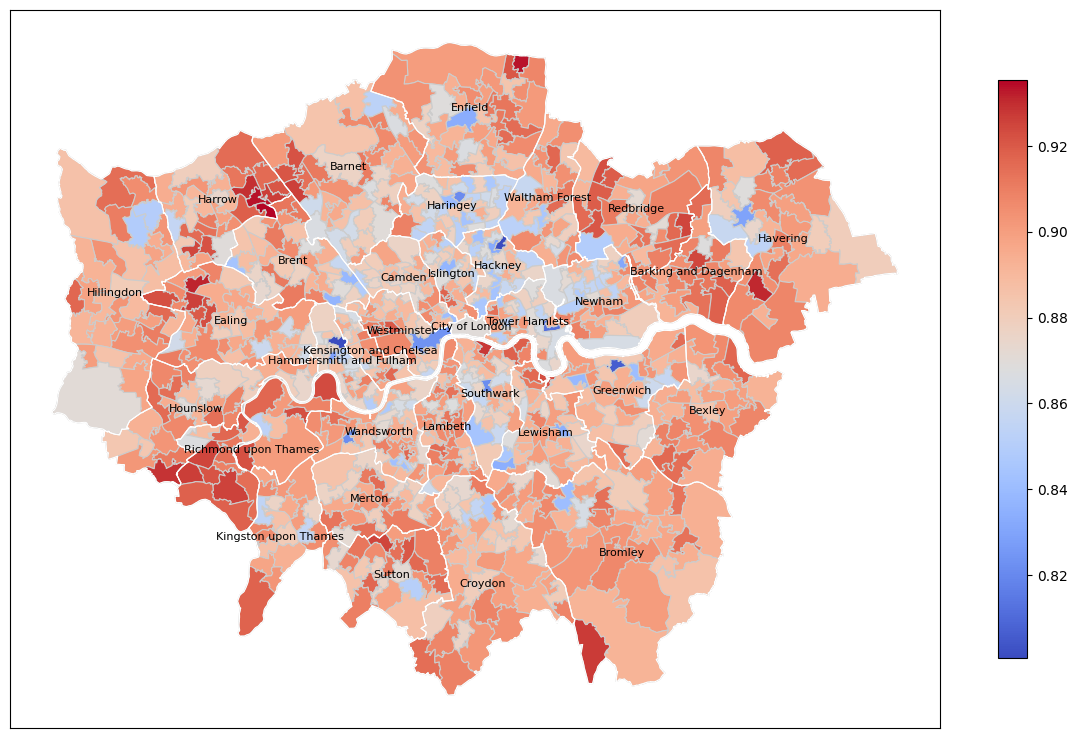

In [21]:
#plot the msoa_shp with coloring each MSOA based on the 'dissimilarity_index' column
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
msoa_shp.plot(column='dissimilarity_index', cmap='coolwarm', 
                            linewidth=0.8, ax=ax, edgecolor='0.8',
                            legend=True, legend_kwds={'shrink': 0.5})

# plot the borough_shp, set the edgecolor to white and linewidth to 0.8
borough_shp.plot(ax=ax, edgecolor='white', linewidth=0.8, facecolor='none')
# label each borough with ;'NAME' columne
for x, y, label in zip(borough_shp.geometry.centroid.x, borough_shp.geometry.centroid.y, borough_shp['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

plt.xticks([])
plt.yticks([])
# set the title of the plot
# plt.title('Dissimilarity Index of MSOA in London')
plt.savefig('output/Dissimilarity_index_msoa_inverse_origin.jpg', dpi=600)
plt.show()

2. destination

all

In [5]:
MSOA_Des_Order_Count = df_des['MSOA11CD_des'].value_counts()
# only filter all the origin oaid that has more than 1200 numbers
MSOA_Des_Order_Count

# save the Ori_Order_Count to a list
MSOA_Des_Order_Count_list = MSOA_Des_Order_Count.index.tolist()
# create a new dataframe, with 80 rows and 2000 columns, fill with 0
MSOA_des_PDFs = pd.DataFrame(np.zeros((len(MSOA_Des_Order_Count_list), 2880)), columns=range(2880))
# add each name in the Ori_Order_Count_list to the df as the index column
MSOA_des_PDFs.index = MSOA_Des_Order_Count_list

# iterate throught eh ori_order_count_list, and get the corresponding rows in the df_origin
for MSOAcode in MSOA_Des_Order_Count_list:
    data_test = df_des[df_des['MSOA11CD_des'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_des_PDFs.loc[MSOAcode] = density_array

C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2203221636.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2203221636.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2203221636.py:15: SettingWithCopyWarning: 
A value is trying to be s

In [6]:
MSOA_des_PDFs.to_csv('output/MSOA_des_PDFs_inverse.csv')

MSOA_des_PDFs_inverse_raw = pd.read_csv('output/MSOA_des_PDFs_inverse.csv', index_col=0)

# normalize each row in the MSOA_des_PDFs
MSOA_des_PDFs_inverse = MSOA_des_PDFs_inverse_raw.div(MSOA_des_PDFs_inverse_raw.sum(axis=1), axis=0)

# calculate the sum of first row in the MSOA_des_PDFs
print(MSOA_des_PDFs_inverse.iloc[0].sum())
print(MSOA_des_PDFs_inverse.iloc[1].sum())

# save all unique values of MSOA_des_PDFs to a list
MSOA_des_PDFs_inverse_list = MSOA_des_PDFs_inverse.index.tolist()
# create a data matrix with 983 rows and 983 columns, filled with 0.00, and the columns and rows are the MSOA_des_PDFs_list
MSOA_des_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_des_PDFs_inverse_list), len(MSOA_des_PDFs_inverse_list))), columns=MSOA_des_PDFs_inverse_list, index=MSOA_des_PDFs_inverse_list)

# for each value in the matrix, calculate the hellinger distance between the two PDF lists of these two MSOAs values
for i in MSOA_des_PDFs_inverse_list:
    for j in MSOA_des_PDFs_inverse_list:
        # calculate the hellinger distance between two PDF lists
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_des_PDFs_inverse.loc[i]) - np.sqrt(MSOA_des_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        # fill the hellinger distance into the matrix
        MSOA_des_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_des_PDFs_inverse_matrix.to_csv('output/MSOA_des_PDFs_inverse_matrix.csv')

1.0000000000000002
0.9999999999999993


In [7]:
# add a new column 'similarity_index' to the msoa_shp
msoa_shp['similarity_index_des'] = 0.00
msoa_shp['adjacent_ele_list_des'] = ""
msoa_shp['adjacent_2level_list_des'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_des'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_des'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_des_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_des_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_des'] = similarity_index

weekdays

In [8]:
# choose monday, tuesday... from df_des
df_des_weekday = df_des[df_des['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

MSOA_Des_weekday_Order_Count = df_des_weekday['MSOA11CD_des'].value_counts()
MSOA_Des_weekday_Order_Count_list = MSOA_Des_weekday_Order_Count.index.tolist()
MSOA_des_weekday_PDFs = pd.DataFrame(np.zeros((len(MSOA_Des_weekday_Order_Count_list), 2880)), columns=range(2880))
MSOA_des_weekday_PDFs.index = MSOA_Des_weekday_Order_Count_list

for MSOAcode in MSOA_Des_weekday_Order_Count_list:
    data_test = df_des_weekday[df_des_weekday['MSOA11CD_des'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_des_weekday_PDFs.loc[MSOAcode] = density_array
    
MSOA_des_weekday_PDFs.to_csv('output/MSOA_des_weekday_PDFs_inverse.csv')

C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2125591563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2125591563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\2125591563.py:11: SettingWithCopyWarning: 
A value is trying to be s

In [9]:
MSOA_des_weekday_PDFs_inverse_raw = pd.read_csv('output/MSOA_des_weekday_PDFs_inverse.csv', index_col=0)

MSOA_des_weekday_PDFs_inverse = MSOA_des_weekday_PDFs_inverse_raw.div(MSOA_des_weekday_PDFs_inverse_raw.sum(axis=1), axis=0)

MSOA_des_weekday_PDFs_inverse_list = MSOA_des_weekday_PDFs_inverse.index.tolist()
MSOA_des_weekday_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_des_weekday_PDFs_inverse_list), len(MSOA_des_weekday_PDFs_inverse_list))), columns=MSOA_des_weekday_PDFs_inverse_list, index=MSOA_des_weekday_PDFs_inverse_list)

for i in MSOA_des_weekday_PDFs_inverse_list:
    for j in MSOA_des_weekday_PDFs_inverse_list:
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_des_weekday_PDFs_inverse.loc[i]) - np.sqrt(MSOA_des_weekday_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        MSOA_des_weekday_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_des_weekday_PDFs_inverse_matrix.to_csv('output/MSOA_des_weekday_PDFs_inverse_matrix.csv')

msoa_shp['similarity_index_des_weekday'] = 0.00
msoa_shp['adjacent_ele_list_des_weekday'] = ""
msoa_shp['adjacent_2level_list_des_weekday'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_des_weekday'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_des_weekday'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_des_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_des_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_des_weekday'] = similarity_index

weekend

In [10]:
df_des_weekend = df_des[df_des['day_of_week'].isin(['Saturday', 'Sunday'])]

MSOA_des_weekday_Order_Count = df_des_weekend['MSOA11CD_des'].value_counts()
MSOA_des_weekday_Order_Count_list = MSOA_des_weekday_Order_Count.index.tolist()
MSOA_des_weekday_PDFs = pd.DataFrame(np.zeros((len(MSOA_des_weekday_Order_Count_list), 2880)), columns=range(2880))
MSOA_des_weekday_PDFs.index = MSOA_des_weekday_Order_Count_list

for MSOAcode in MSOA_des_weekday_Order_Count_list:
    data_test = df_des_weekend[df_des_weekend['MSOA11CD_des'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_des_weekday_PDFs.loc[MSOAcode] = density_array
    
MSOA_des_weekday_PDFs.to_csv('output/MSOA_des_weekend_PDFs_inverse.csv')

MSOA_des_weekday_PDFs_inverse_raw = pd.read_csv('output/MSOA_des_weekend_PDFs_inverse.csv', index_col=0)

MSOA_des_weekday_PDFs_inverse = MSOA_des_weekday_PDFs_inverse_raw.div(MSOA_des_weekday_PDFs_inverse_raw.sum(axis=1), axis=0)
MSOA_des_weekday_PDFs_inverse_list = MSOA_des_weekday_PDFs_inverse.index.tolist()
MSOA_des_weekday_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_des_weekday_PDFs_inverse_list), len(MSOA_des_weekday_PDFs_inverse_list))), columns=MSOA_des_weekday_PDFs_inverse_list, index=MSOA_des_weekday_PDFs_inverse_list)

for i in MSOA_des_weekday_PDFs_inverse_list:
    for j in MSOA_des_weekday_PDFs_inverse_list:
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_des_weekday_PDFs_inverse.loc[i]) - np.sqrt(MSOA_des_weekday_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        MSOA_des_weekday_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_des_weekday_PDFs_inverse_matrix.to_csv('output/MSOA_des_weekend_PDFs_inverse_matrix.csv')

msoa_shp['similarity_index_des_weekend'] = 0.00
msoa_shp['adjacent_ele_list_des_weekend'] = ""
msoa_shp['adjacent_2level_list_des_weekend'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_des_weekend'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_des_weekend'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_des_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_des_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_des_weekend'] = similarity_index

C:\Users\dune\AppData\Local\Temp\ipykernel_27044\137318973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\137318973.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\137318973.py:10: SettingWithCopyWarning: 
A value is trying to be set 

1. rerun origin

all

In [14]:
MSOA_Ori_Order_Count = df_origin['MSOA11CD_origin'].value_counts()
MSOA_Ori_Order_Count_list = MSOA_Ori_Order_Count.index.tolist()
MSOA_origin_PDFs = pd.DataFrame(np.zeros((len(MSOA_Ori_Order_Count_list), 2880)), columns=range(2880))
MSOA_origin_PDFs.index = MSOA_Ori_Order_Count_list

for MSOAcode in MSOA_Ori_Order_Count_list:
    data_test = df_origin[df_origin['MSOA11CD_origin'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_origin_PDFs.loc[MSOAcode] = density_array
    
MSOA_origin_PDFs.to_csv('output/MSOA_origin_PDFs_inverse.csv')

MSOA_origin_PDFs_inverse_raw = pd.read_csv('output/MSOA_origin_PDFs_inverse.csv', index_col=0)

MSOA_origin_PDFs_inverse = MSOA_origin_PDFs_inverse_raw.div(MSOA_origin_PDFs_inverse_raw.sum(axis=1), axis=0)
MSOA_origin_PDFs_inverse_list = MSOA_origin_PDFs_inverse.index.tolist()
MSOA_origin_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_origin_PDFs_inverse_list), len(MSOA_origin_PDFs_inverse_list))), columns=MSOA_origin_PDFs_inverse_list, index=MSOA_origin_PDFs_inverse_list)

for i in MSOA_origin_PDFs_inverse_list:
    for j in MSOA_origin_PDFs_inverse_list:
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_origin_PDFs_inverse.loc[i]) - np.sqrt(MSOA_origin_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        MSOA_origin_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_origin_PDFs_inverse_matrix.to_csv('output/MSOA_origin_PDFs_inverse_matrix.csv')

msoa_shp['similarity_index_origin'] = 0.00
msoa_shp['adjacent_ele_list_origin'] = ""
msoa_shp['adjacent_2level_list_origin'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_origin'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_origin'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_origin'] = similarity_index
    

C:\Users\dune\AppData\Local\Temp\ipykernel_27044\454870975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\454870975.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\454870975.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

weekdays


In [12]:
df_origin_weekday = df_origin[df_origin['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

MSOA_origin_weekday_Order_Count = df_origin_weekday['MSOA11CD_origin'].value_counts()
MSOA_origin_weekday_Order_Count_list = MSOA_origin_weekday_Order_Count.index.tolist()
MSOA_origin_weekday_PDFs = pd.DataFrame(np.zeros((len(MSOA_origin_weekday_Order_Count_list), 2880)), columns=range(2880))
MSOA_origin_weekday_PDFs.index = MSOA_origin_weekday_Order_Count_list

for MSOAcode in MSOA_origin_weekday_Order_Count_list:
    data_test = df_origin_weekday[df_origin_weekday['MSOA11CD_origin'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_origin_weekday_PDFs.loc[MSOAcode] = density_array
    
MSOA_origin_weekday_PDFs.to_csv('output/MSOA_origin_weekday_PDFs_inverse.csv')

MSOA_origin_weekday_PDFs_inverse_raw = pd.read_csv('output/MSOA_origin_weekday_PDFs_inverse.csv', index_col=0)

MSOA_origin_weekday_PDFs_inverse = MSOA_origin_weekday_PDFs_inverse_raw.div(MSOA_origin_weekday_PDFs_inverse_raw.sum(axis=1), axis=0)
MSOA_origin_weekday_PDFs_inverse_list = MSOA_origin_weekday_PDFs_inverse.index.tolist()
MSOA_origin_weekday_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_origin_weekday_PDFs_inverse_list), len(MSOA_origin_weekday_PDFs_inverse_list))), columns=MSOA_origin_weekday_PDFs_inverse_list, index=MSOA_origin_weekday_PDFs_inverse_list)

for i in MSOA_origin_weekday_PDFs_inverse_list:
    for j in MSOA_origin_weekday_PDFs_inverse_list:
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_origin_weekday_PDFs_inverse.loc[i]) - np.sqrt(MSOA_origin_weekday_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        MSOA_origin_weekday_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_origin_weekday_PDFs_inverse_matrix.to_csv('output/MSOA_origin_weekday_PDFs_inverse_matrix.csv')

msoa_shp['similarity_index_origin_weekday'] = 0.00
msoa_shp['adjacent_ele_list_origin_weekday'] = ""
msoa_shp['adjacent_2level_list_origin_weekday'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_origin_weekday'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_origin_weekday'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_origin_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_origin_weekday_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_origin_weekday'] = similarity_index
    


C:\Users\dune\AppData\Local\Temp\ipykernel_27044\1135567678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\1135567678.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\1135567678.py:10: SettingWithCopyWarning: 
A value is trying to be s

weekend

In [13]:
df_origin_weekend = df_origin[df_origin['day_of_week'].isin(['Saturday', 'Sunday'])]

MSOA_origin_weekend_Order_Count = df_origin_weekend['MSOA11CD_origin'].value_counts()
MSOA_origin_weekend_Order_Count_list = MSOA_origin_weekend_Order_Count.index.tolist()
MSOA_origin_weekend_PDFs = pd.DataFrame(np.zeros((len(MSOA_origin_weekend_Order_Count_list), 2880)), columns=range(2880))
MSOA_origin_weekend_PDFs.index = MSOA_origin_weekend_Order_Count_list

for MSOAcode in MSOA_origin_weekend_Order_Count_list:
    data_test = df_origin_weekend[df_origin_weekend['MSOA11CD_origin'] == MSOAcode]
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    density_array = np.array(density)
    MSOA_origin_weekend_PDFs.loc[MSOAcode] = density_array
    
MSOA_origin_weekend_PDFs.to_csv('output/MSOA_origin_weekend_PDFs_inverse.csv')

MSOA_origin_weekend_PDFs_inverse_raw = pd.read_csv('output/MSOA_origin_weekend_PDFs_inverse.csv', index_col=0)

MSOA_origin_weekend_PDFs_inverse = MSOA_origin_weekend_PDFs_inverse_raw.div(MSOA_origin_weekend_PDFs_inverse_raw.sum(axis=1), axis=0)
MSOA_origin_weekend_PDFs_inverse_list = MSOA_origin_weekend_PDFs_inverse.index.tolist()
MSOA_origin_weekend_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_origin_weekend_PDFs_inverse_list), len(MSOA_origin_weekend_PDFs_inverse_list))), columns=MSOA_origin_weekend_PDFs_inverse_list, index=MSOA_origin_weekend_PDFs_inverse_list)

for i in MSOA_origin_weekend_PDFs_inverse_list:
    for j in MSOA_origin_weekend_PDFs_inverse_list:
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_origin_weekend_PDFs_inverse.loc[i]) - np.sqrt(MSOA_origin_weekend_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        MSOA_origin_weekend_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_origin_weekend_PDFs_inverse_matrix.to_csv('output/MSOA_origin_weekend_PDFs_inverse_matrix.csv')

msoa_shp['similarity_index_origin_weekend'] = 0.00
msoa_shp['adjacent_ele_list_origin_weekend'] = ""
msoa_shp['adjacent_2level_list_origin_weekend'] = ""

for index, row in msoa_shp.iterrows():
    MSOAcode = row['MSOA11CD']
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    msoa_shp.at[index, 'adjacent_ele_list_origin_weekend'] = adjacent['MSOA11CD'].tolist()
    msoa_shp.at[index, 'adjacent_2level_list_origin_weekend'] = adjacent_2level['MSOA11CD'].tolist()
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_origin_weekend_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_origin_weekend_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    msoa_shp.loc[index, 'similarity_index_origin_weekend'] = similarity_index
    
    

C:\Users\dune\AppData\Local\Temp\ipykernel_27044\649812391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\649812391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_27044\649812391.py:10: SettingWithCopyWarning: 
A value is trying to be set 

In [17]:
msoa_shp.to_csv('output/similarity_index_adjancecy.csv')